In [31]:
import numpy as np
import time
from tqdm import tqdm # esta librería es para mirar el progreso de un for

In [48]:
cant_muestras = 500

# Secuencias de ADN

Las secuencias de ADN son cadenas largas y complejas de nucleótidos que contienen la información genética de los organismos vivos. Estas secuencias están formadas por cuatro bases nitrogenadas: adenina (A), citosina (C), guanina (G) y timina (T), que se combinan en un orden específico.

Mediante el estudio de las secuencias de ADN, los científicos pueden comprender la diversidad genética, identificar genes y mutaciones asociados a enfermedades, reconstruir la evolución de especies y realizar investigaciones en campos como la medicina, la biotecnología y la genómica.

<div>
<center>
<img src="https://innovativegenomics.org/wp-content/uploads/2018/04/DNA.png", width=200>
</center>
</div>

In [54]:
# Definimos unas secuencias
# Cadenas
# A -> 1
# G -> 2
# C -> 3
# T -> 4
# N -> 5
Secuencia1 = "ACGTCGTCGAGCTAGCATCGATCAGNNNCATCATCNACTATACNNNNCATCATCATCTACTGCTACGACTACGAGAGAGCTACGACTACG"*cant_muestras
#Secuencia2 = "NGCNATCACGATGCATGCACTACGATCGACAGCATCGATCGATGCATCATGCATCGNATGCNTGASCSATCGACGTANGCACTGACNTGA"*cant_muestras
Secuencia2 = Secuencia1

#SecuenciaLTR = "CACTAGACTAGACTAGCNAGCTACGCATGGCTACNCTACGACAGCTAGCTANCTATCNACTACNAGCTACTAGCTANNNACTANCTCGACTACGACTACACTGACCACTAGAC"*cant_muestras
#Secuencia1, Secuencia2 = SecuenciaLTR, SecuenciaLTR

In [55]:
mapeo = { 'N': 0, 'A': 1, 'G': 2, 'C': 3, 'T': 4,}
nueva_secuencia = np.array([],dtype=np.uint8)
for c in Secuencia1:
    nueva_secuencia = np.append(nueva_secuencia, mapeo[c])

print(nueva_secuencia)        

[1 3 2 ... 1 3 2]


In [56]:
n_secuencia1 = nueva_secuencia
n_secuencia2 = nueva_secuencia

In [57]:
begin = time.time()
dotplot = np.zeros((len(n_secuencia1), len(n_secuencia2)), dtype=np.bool_)
print("La matriz de resultado tiene tamaño:", dotplot.shape)

np.equal(n_secuencia1[:, None], n_secuencia2, out=dotplot)

print("\nEl código se ejecutó en:", time.time() - begin, "segundos")
print("Peso en bytes:", dotplot.nbytes)
print("Peso en megabytes:", dotplot.nbytes / (1024 * 1024))

La matriz de resultado tiene tamaño: (90000, 90000)

El código se ejecutó en: 4.383739471435547 segundos
Peso en bytes: 8100000000
Peso en megabytes: 7724.761962890625


# Visualizar el dotplot

In [29]:
import matplotlib.pyplot as plt
def draw_dotplot(matrix, fig_name='dotplot.svg'):
  plt.figure(figsize=(5,5))
  plt.imshow(matrix, cmap='Greys',aspect='auto')

  plt.ylabel("Secuencia 1")
  plt.xlabel("Secuencia 2")
  plt.savefig(fig_name)

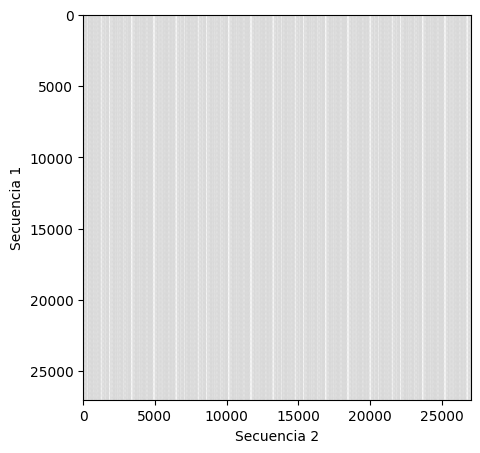

In [30]:
draw_dotplot(dotplot[:27000,:27000 ])


# Comparemos la misma secuencia ⬆
# Cambiemos la cantidad de muestras ⬆ 

# Ahora vamos a realizar la paralelización con MULTIPROCESSING

In [1]:
import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt

SecuenciaLTR = "CACTAGACTAGACTAGCNAGCTACGCATGGCTACNCTACGACAGCTAGCTANCTATCNACTACNAGCTACTAGCTANNNACTANCTCGACTACGACTACACTGACCACTAGAC"*100
Secuencia1 = SecuenciaLTR
Secuencia2 = SecuenciaLTR

def worker(args):
    i, Secuencia1, Secuencia2 = args
    return [Secuencia1[i] == Secuencia2[j] for j in range(len(Secuencia2))]

def parallel_dotplot(Secuencia1, Secuencia2, threads=mp.cpu_count()):
    with mp.Pool(processes=threads) as pool:
        result = pool.map(worker, [(i, Secuencia1, Secuencia2) for i in range(len(Secuencia1))])
    return result

begin = time.time()
dotplot = np.array(parallel_dotplot(Secuencia1, Secuencia2,4))

print("La matriz de resultado tiene tamaño: ", dotplot.shape)
print(f"\n El código se ejecutó en: {time.time() - begin} segundos")

## Vamos a visualizar el dotplot
draw_dotplot(dotplot,fig_name='dotplot_parallel.svg')


NameError: name 'time' is not defined

## Realicemos un ejercicio de análisis de rendimiento 
También probemos con diferentes longitudes de secuencias como es el comportamiento  y  y el escalamiento del algoritmo. 

*   Vamos a analizar el desempeño del programa paralelo respecto al secuencial. (métricas de desempeño)  
*   Revisemos la ley de amdahl
*   Veamos el escalamiento del algoritmo.

In [ ]:
#@title Funciones para realizar el análisis
#@markdown draw_dotplot(matrix) \\
#@markdown dotplot_secuencial(Secuencia1, Secuencia2) \\
#@markdown dotplot_multiprocessing(Secuencia1, Secuencia2)

def draw_dotplot(matrix,fig_name='dotplot.svg'):
  plt.figure(figsize=(5,5))
  plt.imshow(matrix, cmap='Greys',aspect='auto')

  plt.ylabel("Secuencia 1")
  plt.xlabel("Secuencia 2")
  plt.savefig(fig_name)

def worker(args):
    i, Secuencia1, Secuencia2 = args
    return [Secuencia1[i] == Secuencia2[j] for j in range(len(Secuencia2))]

def parallel_dotplot(Secuencia1, Secuencia2,threads=mp.cpu_count()):
    with mp.Pool(processes=threads) as pool:
        result = pool.map(worker, [(i, Secuencia1, Secuencia2) for i in range(len(Secuencia1))])
    return result

def dotplot_secuencial(sec1, sec2):
  dotplot = np.empty([len(sec1),len(sec2)])
  #print("La matriz de resultado tiene tamaño: ", dotplot.shape)

  for i in range(dotplot.shape[0]):
    for j in range(dotplot.shape[1]):
      if sec1[i] == sec2[j]:
        dotplot[i,j] = 1
      else:
        dotplot[i,j] = 0

  return dotplot

def dotplot_multiprocessing(sec1,sec2,threads=mp.cpu_count()):
  dotplot = np.array(parallel_dotplot(sec1, sec2,threads))
  return dotplot

In [ ]:
# Veamos el tiempo con 1 procesador
begin_secuencial = time.time()
dotplot_secuencial(Secuencia2, Secuencia2)
end_secuencial = time.time()

print(f"el tiempo secuencial es: {end_secuencial-begin_secuencial} ")

begin_paralelo = time.time()
dotplot_multiprocessing(Secuencia2, Secuencia2,2)
end_paralelo = time.time()

print(f"el tiempo paralelo es: {end_paralelo-begin_paralelo} ")

el tiempo secuencial es: 26.648210287094116 
el tiempo paralelo es: 15.204275846481323 


In [ ]:
n_proc = [1,2,4,8]
times = []  
for i in n_proc:
    
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia2, Secuencia2,i)
    end_paralelo = time.time()
    times.append(end_paralelo-begin_paralelo)   
    print("Dotplot con ",i," procesadores, timepo: ",end_paralelo-begin_paralelo)

Dotplot con  1  procesadores, timepo:  18.947975635528564
Dotplot con  2  procesadores, timepo:  15.580895185470581
Dotplot con  4  procesadores, timepo:  13.302807569503784
Dotplot con  8  procesadores, timepo:  13.239622831344604


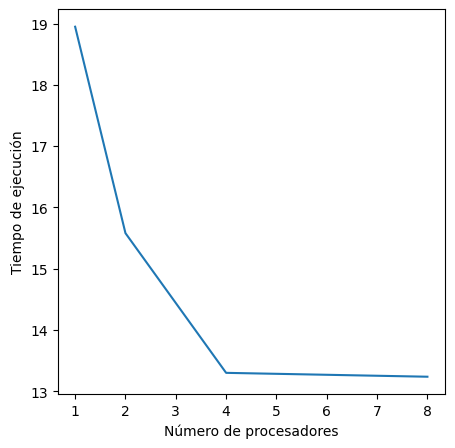

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(n_proc,times)  
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")
plt.show()

In [ ]:
acel = [times[0]/i for i in times]
efic = [acel[i]/n_proc[i] for i in range(len(n_proc))]
print("Aceleración: ",acel)
print("Eficiencia: ",efic)

Aceleración:  [1.0, 1.2161031449077353, 1.4243591464831926, 1.4311567540028045]
Eficiencia:  [1.0, 0.6080515724538677, 0.35608978662079815, 0.17889459425035056]


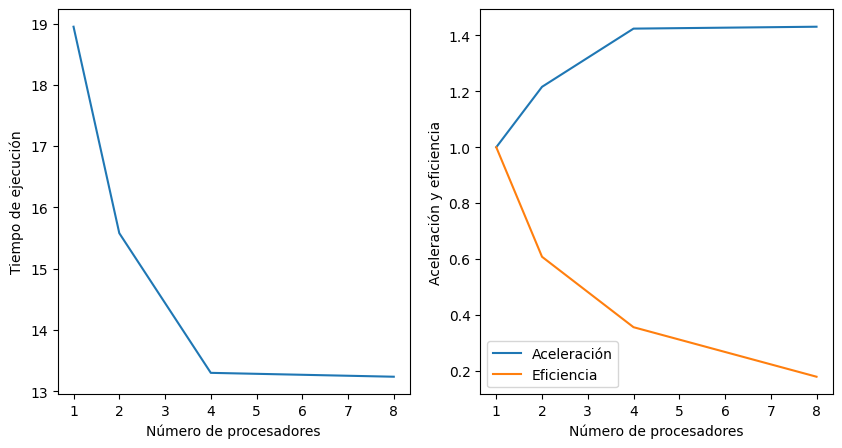

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_proc,times)
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")
plt.subplot(1,2,2)
plt.plot(n_proc,acel)
plt.plot(n_proc,efic)
plt.xlabel("Número de procesadores")
plt.ylabel("Aceleración y eficiencia")
plt.legend(["Aceleración","Eficiencia"])
plt.show()


In [ ]:
print("Aceleración Maxima: ",max(acel))

Aceleración Maxima:  1.4311567540028045


### Miremos el escalamiento del algoritmo (Débil y fuerte)

In [ ]:
n_proc = [1, 2, 4, 8]
strong_times = []  
weak_times = []

In [ ]:

for i in n_proc:
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia2, Secuencia2, i)
    end_paralelo = time.time()
    strong_times.append(end_paralelo - begin_paralelo)   
    print("Dotplot con ", i, " procesadores, tiempo: ", end_paralelo - begin_paralelo)

Dotplot con  1  procesadores, tiempo:  18.52076745033264
Dotplot con  2  procesadores, tiempo:  15.390373706817627
Dotplot con  4  procesadores, tiempo:  13.447119235992432
Dotplot con  8  procesadores, tiempo:  13.039320707321167


In [ ]:
for i in n_proc:
    Secuencia = Secuencia2[:len(Secuencia2)*i]  # Incrementa el tamaño de la secuencia.
    begin_paralelo = time.time()
    dotplot_multiprocessing(Secuencia, Secuencia, i)
    end_paralelo = time.time()
    weak_times.append(end_paralelo - begin_paralelo)   
    print("Dotplot con ", i, " procesadores, tiempo: ", end_paralelo - begin_paralelo)

Dotplot con  1  procesadores, tiempo:  18.372899055480957
Dotplot con  2  procesadores, tiempo:  15.486223459243774
Dotplot con  4  procesadores, tiempo:  13.270490407943726
Dotplot con  8  procesadores, tiempo:  13.131811141967773


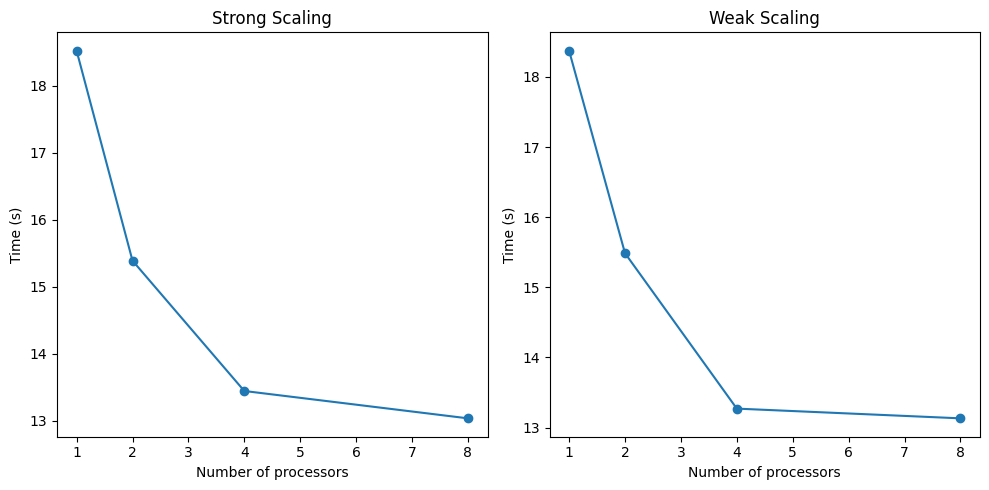

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_proc, strong_times, marker='o')
plt.title("Strong Scaling")
plt.xlabel("Number of processors")
plt.ylabel("Time (s)")

plt.subplot(1, 2, 2)
plt.plot(n_proc, weak_times, marker='o')
plt.title("Weak Scaling")
plt.xlabel("Number of processors")
plt.ylabel("Time (s)")

plt.tight_layout()
plt.show()

# Actividad:

Realizar el análisis de tiempo de la estrategia teniendo en cuenta el tiempo que le toma al programa guardar la imágen de salida.

# Ahora miremos la estrategia de paralelización con MPI4PY

In [ ]:
!mpirun -n 1 python3 dotplotMPI_sln.py

Tiempo total de ejecución: 91.3422167301178 segundos


In [ ]:
!mpirun -n 2 python3 dotplotMPI_sln.py

Tiempo total de ejecución: 52.30583643913269 segundos


In [ ]:
!mpirun -n 4 python3 dotplotMPI_sln.py

Tiempo total de ejecución: 32.51081418991089 segundos


In [ ]:
!mpirun -n 8 python3 dotplotMPI_sln.py

Tiempo total de ejecución: 21.823227405548096 segundos


# Carguemos los archivos FASTA que contienen las secuencias

In [ ]:
from Bio import SeqIO

def merge_sequences_from_fasta(file_path):
    sequences = []  # List to store all sequences
    for record in SeqIO.parse(file_path, "fasta"):
        # `record.seq` gives the sequence
        sequences.append(str(record.seq))
    return "".join(sequences)

In [ ]:
file_path_1 = "E_coli.fna"
file_path_2 = "Salmonella.fna"

merged_sequence_1 = merge_sequences_from_fasta(file_path_1) # estas son las secuencias que se van a utilizar para el dotplot
merged_sequence_2 = merge_sequences_from_fasta(file_path_2)

In [ ]:
print("longitud Archivo 1:", len(merged_sequence_1))
print("longitud Archivo 2:", len(merged_sequence_2))

longitud Archivo 1: 4641652
longitud Archivo 2: 4951383
